# Plotting Basics

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In this assignment I decided to pick a dataset related to exoplanets. These are planets that are orbiting around other stars. As of May 9th, 2019 there are a total of 3952 confirmed exoplanet discoveries. The dataset came from the [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/index.html). Each column represents different planetary parameters as well as parameters of its parent star.

## Load Data
Read in the dataset into a Pandas DataFrame.

In [2]:
df = pd.read_csv('data/exoplanets.csv', header=18)

Using the **`info()`** method in Pandas I print out few details about the dataset. Specifically, the column names, number of non-null items per column, the data type per column, and the total length of the DataFrame.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952 entries, 0 to 3951
Data columns (total 12 columns):
pl_name        3952 non-null object
pl_pnum        3952 non-null int64
pl_orbper      3848 non-null float64
pl_orbsmax     2289 non-null float64
pl_orbeccen    1301 non-null float64
pl_orbincl     776 non-null float64
pl_bmassj      1536 non-null float64
pl_radj        3085 non-null float64
st_dist        3939 non-null float64
st_teff        3775 non-null float64
st_mass        3184 non-null float64
st_rad         3659 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 370.6+ KB


For this exercise, I will only consider a subset of these columns. This subset will include planetary orbital period (`pl_orbper`), planetary mass (`pl_bmassj`), and parent star mass (`st_mass`).

In [4]:
columns = ['pl_orbper', 'pl_bmassj', 'st_mass']

In [5]:
sub_df = df.loc[:, columns].dropna()  # Remove any row that contains empty values.

Here I investigate some statistical properties of this subset of data using the **`describe()`** method in Pandas. Notice the large spread in values and that the `50%` value is far from the `max` value.

In [6]:
sub_df.describe().T

,count,mean,std,min,25%,50%,75%,max
pl_orbper,1392.0,6055.648239,195711.950712,0.090706,4.113785,22.16875,494.785,7300000.00
pl_bmassj,1392.0,2.348423,4.137280,0.000060,0.108750,0.91000,2.430,55.59
st_mass,1392.0,1.136272,0.932789,0.020000,0.850000,1.05000,1.270,23.56


In [31]:
sub_df.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
pl_orbper,1392.0,6055.648239,195711.950712,0.090706,2.644056,3.577731,4.86813,9.28818,22.16875,92.1636,344.859,702.400,1633.600,7300000.00
pl_bmassj,1392.0,2.348423,4.137280,0.000060,0.020423,0.052150,0.27590,0.57280,0.91000,1.3400,1.977,3.098,6.781,55.59
st_mass,1392.0,1.136272,0.932789,0.020000,0.630000,0.800000,0.90000,0.98000,1.05000,1.1200,1.210,1.330,1.540,23.56


In [ ]:
sub_df['pl_orbper_log'] 

## Box Plots
Box plots are useful for understanding the spread in values for a variable in the dataset.

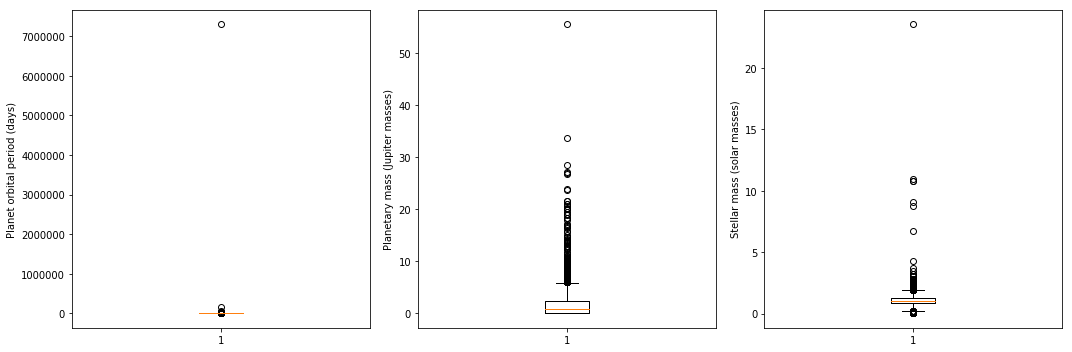

In [7]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(sub_df['pl_orbper'])
plt.ylabel('Planet orbital period (days)')

plt.subplot(1, 3, 2)
plt.boxplot(sub_df['pl_bmassj'])
plt.ylabel('Planetary mass (Jupiter masses)')

plt.subplot(1, 3, 3)
plt.boxplot(sub_df['st_mass'])
plt.ylabel('Stellar mass (solar masses)')

plt.tight_layout()
plt.show()

**Observations:**

These plots show that for orbital period, planet mass, and stellar mass there is a wide range in values, with values clustered mostly to one end.

## Histograms
We can also view the distributions for planetary orbital period, planetery mass, and stellar mass using histograms. A histogram creates equally spaced bins for a range in values and plots the number of values in each bin.

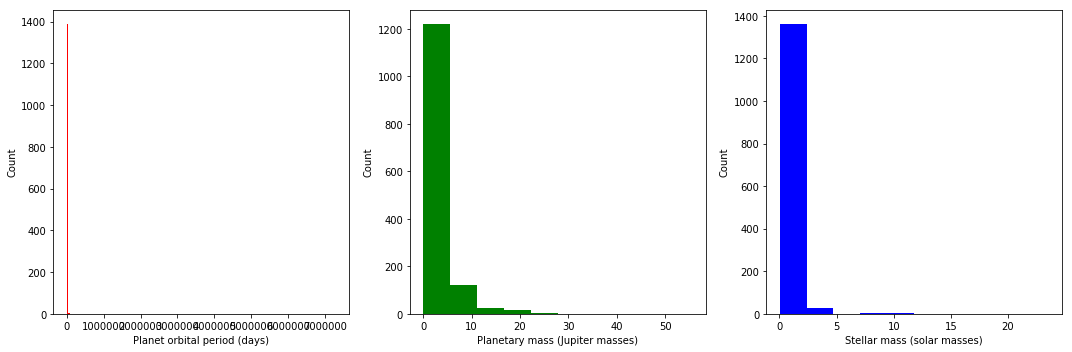

In [10]:
plt.figure(figsize=(15, 5))

# Filter dataframe to only include values greater than 0

plt.subplot(1, 3, 1)
plt.hist(sub_df['pl_orbper'], color='red', bins=200)
plt.xlabel('Planet orbital period (days)')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(sub_df['pl_bmassj'], color='green')
plt.xlabel('Planetary mass (Jupiter masses)')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(sub_df['st_mass'], color='blue')
plt.xlabel('Stellar mass (solar masses)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Observations:**

Each distribution is clearly one-sided, with the majority of values clustered around the lower end.

## Thresholding
This one-sided nature for these values makes it hard to view the distribution shape for thess values. Therefore, I decided to define thresholds to only include values up to a certain limit

In [26]:
orbit_period_thresh = 100
planet_mass_thresh = 5
stellar_mass_thresh = 5

In [19]:
df_thresh = sub_df[(sub_df['pl_orbper'] <= orbit_period_thresh) & 
                   (sub_df['st_mass'] <= stellar_mass_thresh) & 
                   (sub_df['pl_bmassj'] <= planet_mass_thresh)]

In [22]:
df_thresh.describe().T

,count,mean,std,min,25%,50%,75%,max
pl_orbper,799.0,13.105564,18.452703,0.090706,3.127541,4.885489,13.5898,98.2114
pl_bmassj,799.0,0.730515,0.960480,0.000060,0.031415,0.390000,1.0420,4.8700
st_mass,799.0,0.999625,0.361494,0.080000,0.810000,1.000000,1.1850,2.7800


In [30]:
df_thresh.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
pl_orbper,799.0,13.105564,18.452703,0.090706,2.068782,2.834568,3.395002,4.039526,4.885489,6.884338,10.757484,17.996074,38.9332,98.2114
pl_bmassj,799.0,0.730515,0.960480,0.000060,0.013138,0.023798,0.042452,0.120000,0.390000,0.598200,0.860000,1.267000,2.0622,4.8700
st_mass,799.0,0.999625,0.361494,0.080000,0.580000,0.770000,0.860000,0.930000,1.000000,1.060000,1.126000,1.224000,1.4000,2.7800


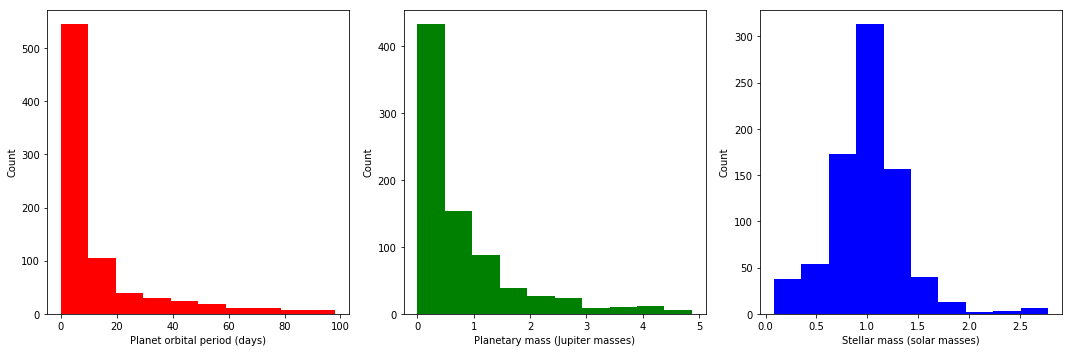

In [11]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_thresh['pl_orbper'], color='red')
plt.xlabel('Planet orbital period (days)')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(df_thresh['pl_bmassj'], color='green')
plt.xlabel('Planetary mass (Jupiter masses)')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(df_thresh['st_mass'], color='blue')
plt.xlabel('Stellar mass (solar masses)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

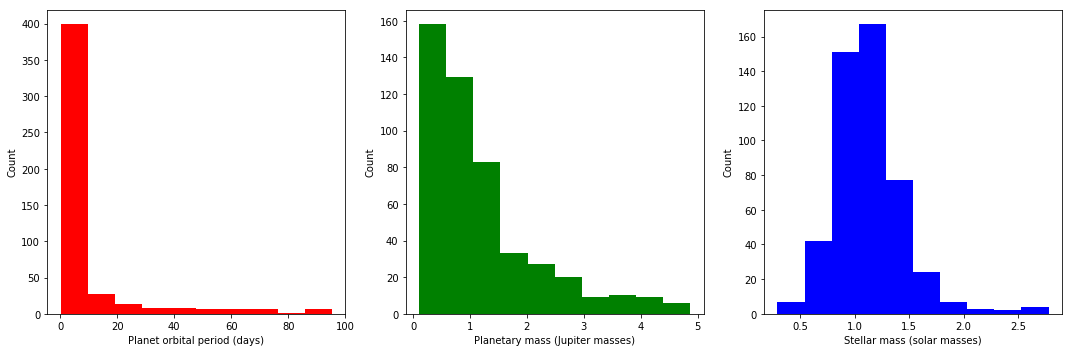

In [29]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_thresh_2['pl_orbper'], color='red')
plt.xlabel('Planet orbital period (days)')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(df_thresh_2['pl_bmassj'], color='green')
plt.xlabel('Planetary mass (Jupiter masses)')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(df_thresh_2['st_mass'], color='blue')
plt.xlabel('Stellar mass (solar masses)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Obseration:** Notice that stellar mass tends to cluster around 1, while planetary orbital period and planetary mass continue increasing toward the lower end.

## Scatter Plots
We can further study these variables by comparing the relationships between them using scatter plots.

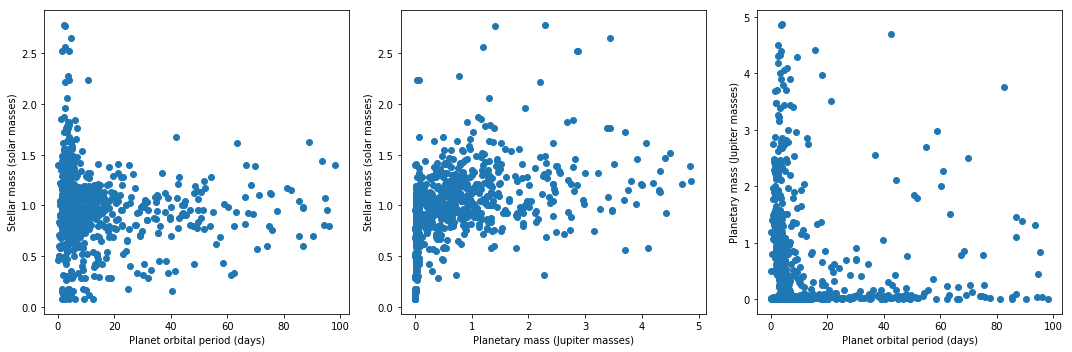

In [12]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x=df_thresh['pl_orbper'], y=df_thresh['st_mass'])
plt.xlabel('Planet orbital period (days)')
plt.ylabel('Stellar mass (solar masses)')

plt.subplot(1, 3, 2)
plt.scatter(x=df_thresh['pl_bmassj'], y=df_thresh['st_mass'])
plt.xlabel('Planetary mass (Jupiter masses)')
plt.ylabel('Stellar mass (solar masses)')

plt.subplot(1, 3, 3)
plt.scatter(x=df_thresh['pl_orbper'], y=df_thresh['pl_bmassj'])
plt.xlabel('Planet orbital period (days)')
plt.ylabel('Planetary mass (Jupiter masses)')

plt.tight_layout()
plt.show()

**Observations:**
1. As stellar mass increases, the planetary orbital period also increases.
2. As stellar mass increases, planetary mass also increases.
3. There is not a relationship between planetary mass and planetar orbital period.